# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [44]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm

In [45]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [46]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [47]:
df.loc[(df.Latitude<0), "Hemisfério"] = 1 #criando nova categoria (coluna) hemisfério
df.loc[(df.Latitude>0), "Hemisfério"] = 2
df["Hemisfério"] = df["Hemisfério"].astype('category') #definindo como categoria
df["Hemisfério"].cat.categories = ('Sul', 'Norte')
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,Sul
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

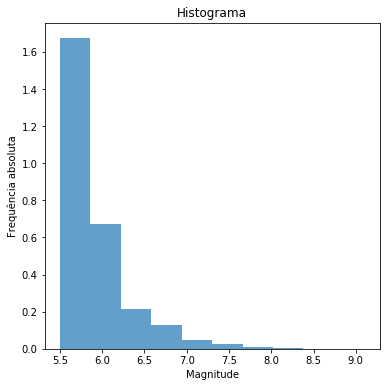

In [48]:
plot = df.Magnitude.plot.hist(title='Histograma', normed=1, figsize=(6, 6), alpha=0.7)
plt.ylabel("Frequência absoluta")
plt.xlabel("Magnitude")


Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [49]:
loc, scale = expon.fit(df["Magnitude"]) #loc = média ; scale = desvio padrão
print(loc, scale)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

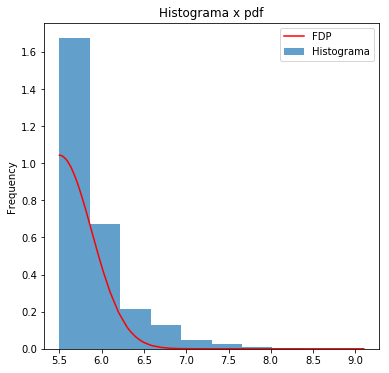

In [50]:
plot = df.Magnitude.plot.hist(title='Histograma', normed=1, figsize=(6, 6), alpha=0.7)
plt.plot(sorted(df.Magnitude), norm.pdf(sorted(df.Magnitude), loc = loc,scale = scale), 'r')
plt.title('Histograma x pdf')
plt.legend(['FDP', 'Histograma'])
plt.show()
#a área do gráfico (integral) nos da a probabilidade de certo evento
#sempre exponencial

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [51]:
ct = pd.crosstab(df.Hemisfério, df.Type, normalize=True)
ct

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Sul,0.545171,0.000085,0.001196,0.000043
Norte,0.447140,0.000085,0.006279,0.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [52]:
(0.447140+0.000085+0.006279/1)*100 #terremoto = qualquer tipo de abalo sísmico

45.35039999999999

Explique o seu raciocínio

Para calcular a probabilidade da ocorrência de um terremoto no hemisfério norte fazemos: a quantidade de ocorrências de terremotos no norte dividido pela quantidade de ocorrências de terremotos no total.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [53]:
#P(NE/HN) = P (NE ∩ HN) / P (HN)
P = (0.006279/(0.447140+0.000085+0.006279+0))*100
P

1.3845522861981372

Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

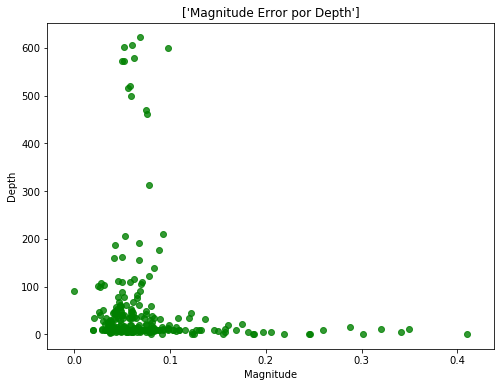

In [54]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df["Magnitude Error"], df.Depth, c="green", alpha=0.8)
plt.title(["Magnitude Error por Depth"])
plt.ylabel("Depth")
plt.xlabel("Magnitude")

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [55]:
df["Magnitude Error"].corr(df.Depth)

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

O valor acima indica que a correlação é negativa, isso significa que os valores de uma variável crescente estão associados aos valores da outra variável decrescente.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [56]:
df.Latitude.describe

<bound method NDFrame.describe of 0        19.2460
1         1.8630
2       -20.5790
3       -59.0760
4        11.9380
5       -13.4050
6        27.3570
7       -13.3090
8       -56.4520
9       -24.5630
10       -6.8070
11       -2.6080
12       54.6360
13      -18.6970
14       37.5230
15      -51.8400
16       51.2510
17       51.6390
18       52.5280
19       51.6260
20       51.0370
21       51.7300
22       51.7750
23       52.6110
24       51.8310
25       51.9480
26       51.4430
27       52.7730
28       51.7720
29       52.9750
          ...   
23382   -10.9640
23383    21.2897
23384    21.3697
23385    14.0882
23386    -4.5049
23387    -4.4244
23388    -5.6497
23389   -10.2137
23390   -34.9886
23391    -6.3046
23392     8.3489
23393   -10.1904
23394    -9.9640
23395   -10.1773
23396    37.1442
23397   -10.1785
23398   -10.1549
23399    -7.5082
23400    21.5036
23401    -5.2453
23402    -5.1460
23403   -43.4029
23404   -43.4810
23405    45.7192
23406    38.3754
23407    38.39

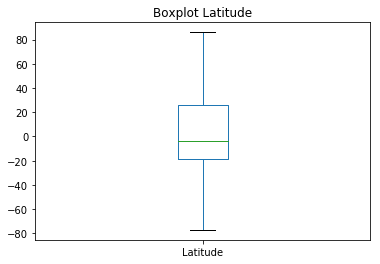

In [57]:
plot=df.Latitude.plot(kind="box", title="Boxplot Latitude")

In [58]:
df.Longitude.describe

<bound method NDFrame.describe of 0        145.6160
1        127.3520
2       -173.9720
3        -23.5570
4        126.4270
5        166.6290
6         87.8670
7        166.2120
8        -27.0430
9        178.4870
10       108.9880
11       125.9520
12       161.7030
13      -177.8640
14        73.2510
15       139.7410
16       178.7150
17       175.0550
18       172.0070
19       175.7460
20       177.8480
21       173.9750
22       173.0580
23       172.5880
24       174.3680
25       173.9690
26       179.6050
27       171.9740
28       174.6960
29       171.0910
           ...   
23382    161.5723
23383    144.4037
23384    144.2175
23385    -90.8691
23386    153.5216
23387    153.5419
23388    153.9975
23389    161.2177
23390   -107.8694
23391    154.3530
23392    137.6672
23393    161.2187
23394    -70.9714
23395    161.2236
23396     84.9583
23397    160.9149
23398    160.7816
23399    127.9206
23400    145.4172
23401    153.5754
23402    153.5166
23403    -73.9395
23404    -74

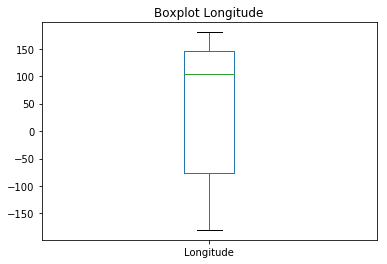

In [59]:
plot=df.Longitude.plot(kind="box", title="Boxplot Longitude")

Os dados do Describe representam os valores da Latitude e Longitude.
O boxplot da Latitude nos informa que a tendência é a de que fique por volta de -10 graus, já o de Longitude por volta de 100 graus.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [60]:
#Dado que aconteceu no norte, qual a probabilidade que seja um explosão nuclear
Pn = (0.006279/(0.447140+0.000085+0.006279+0))*100
Pn

1.3845522861981372

In [61]:
#Dado que aconteceu no Sul, qual a probabilidade que seja um explosão nuclear
Ps = (0.001196/(0.545171+0.000085+0.001196+0.000043))*100
Ps

0.21884921179516742

A partir da análise da probabilidade de uma Nuclear Explosion acontecer nos diferentes hemisfério, é possível perceber que e mais provável que tenha acontecido no Norte. Essa interpretação também pode ser feita pela tabela cruzada (Q3), onde a quantidade de Nuclear Explosion no norte é maior que no Sul.